In [1]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset
df = pd.read_csv('guvi-courses.csv')
df.shape

(3680, 12)

In [3]:
df.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development


In [4]:
df.columns

Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3677 non-null   object 
dtypes: float64(7), object(5)
memory usage: 345.1+ KB


In [6]:
df.isnull().sum()

course_id              4
course_title           4
url                    4
price                  4
num_subscribers        4
num_reviews            4
num_lectures           4
level                  4
Rating                 4
content_duration       4
published_timestamp    4
subject                3
dtype: int64

In [7]:
df.loc[df['course_id'].isnull()]

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Subject: Web Development
2490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Pre-Processing

In [8]:
df = df.dropna()

In [9]:
df.shape

(3676, 12)

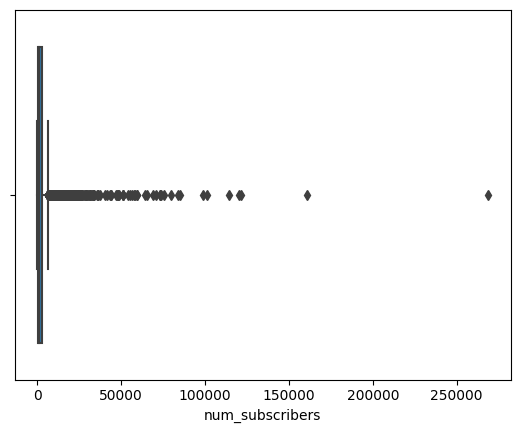

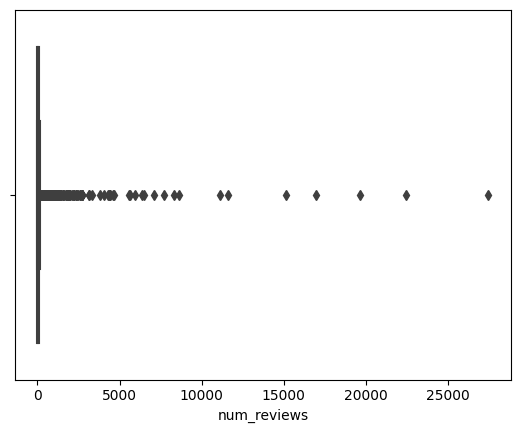

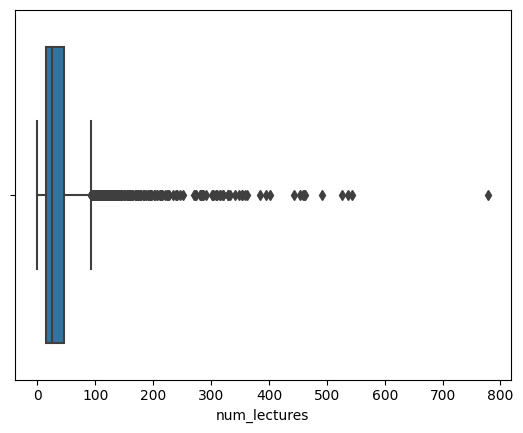

In [111]:
import seaborn as sns

sns.boxplot(data=df, x="num_subscribers")
plt.show()


sns.boxplot(data=df, x="num_reviews")
plt.show()



sns.boxplot(data=df, x="num_lectures")
plt.show()

In [115]:
df_new = df[df['num_subscribers'] != 0]
df_new = df_new[df_new['num_reviews'] != 0]

In [117]:

df_new.tail()
df_new.shape

(3392, 12)

In [119]:

df_new_data = df.loc[df['num_reviews'] != 0]

In [121]:
df_new_data = df.loc[df['num_subscribers'] != 0]
df_new_data.shape

(3611, 12)

In [122]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

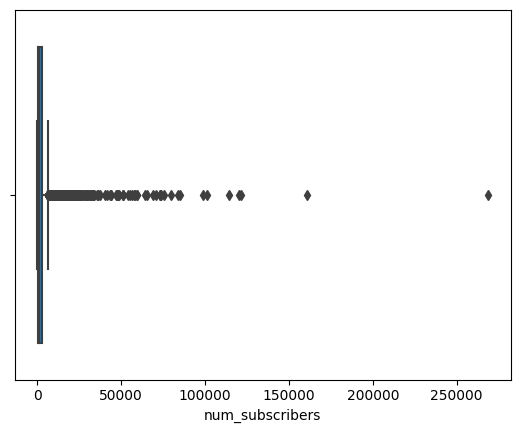

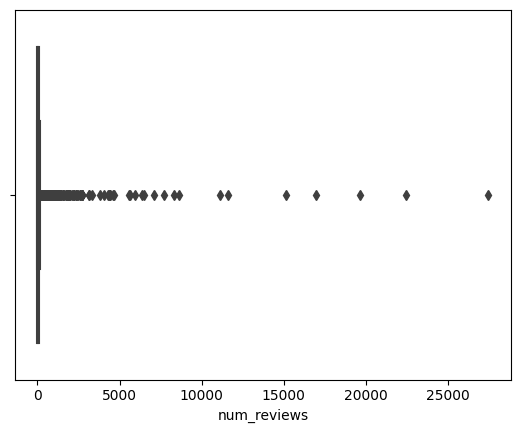

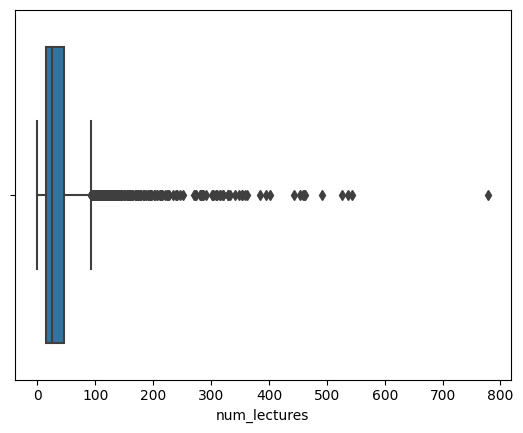

In [155]:
sns.boxplot(data=df_new_data, x="num_subscribers")
plt.show()


sns.boxplot(data=df, x="num_reviews")
plt.show()



sns.boxplot(data=df, x="num_lectures")
plt.show()

# Outlier detection and removal


In [167]:

mean = np.mean(df_new_data) 
std = np.std(df_new_data) 
print('mean of the dataset is', mean) 
print('std. deviation is', std) 


mean of the dataset is course_id           669282.397674
price                   66.462199
num_subscribers       3256.849349
num_reviews            159.123511
num_lectures            40.626973
level                    0.724453
Rating                   0.610654
content_duration         4.143460
dtype: float64
std. deviation is course_id           340259.325454
price                   61.303639
num_subscribers       9560.478091
num_reviews            943.692684
num_lectures            50.695305
level                    0.960711
Rating                   0.334948
content_duration         6.096168
dtype: float64


In [207]:
threshold = 3
outlier = [] 

#df_rm_outliers = 

for i in df_new_data.iterrows(): 
    #print(mean['num_subscribers'])
    z = (i[1]['num_subscribers']-mean['num_subscribers'])/std['num_subscribers']
    
    if z > threshold: 
        #outlier.append(i) 
        df_new_data.drop(i[0],inplace=True)
print('outlier in dataset is', outlier) 

outlier in dataset is []


In [209]:
threshold = 3
outlier = [] 

#df_rm_outliers = 

for i in df_new_data.iterrows(): 
    #print(mean['num_subscribers'])
    z = (i[1]['num_reviews']-mean['num_reviews'])/std['num_reviews']
    
    if z > threshold: 
        #outlier.append(i) 
        df_new_data.drop(i[0],inplace=True)
print('outlier in dataset is', outlier) 

outlier in dataset is []


In [210]:
df_new_data.shape

(3556, 12)

In [114]:
df_sub=df.nlargest(10, ['num_subscribers']) 
df_rev=df.nlargest(10, ['num_reviews']) 
df_rat=df.nlargest(10, ['Rating']) 

# EDA

In [20]:
df_sub

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development
3000,19421.0,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,0.0,101154.0,1042.0,95.0,All Levels,0.88,4.5,2012-06-15T17:00:33Z,Musical Instruments
5,473160.0,Web Design for Web Developers: Build Beautiful...,https://www.udemy.com/web-design-secrets/,0.0,98867.0,6512.0,20.0,All Levels,0.82,3.0,2015-04-13T18:29:47Z,Subject: Web Development
6,94430.0,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-...,30.0,84897.0,2685.0,10.0,All Levels,0.79,2.0,2013-10-10T15:19:29Z,Subject: Web Development
7,130064.0,Practical PHP: Master the Basics and Code Dyna...,https://www.udemy.com/code-dynamic-websites/,0.0,83737.0,4598.0,45.0,Intermediate Level,0.85,6.5,2014-07-19T03:02:05Z,Subject: Web Development
8,364426.0,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,175.0,79612.0,16976.0,85.0,All Levels,0.69,11.5,2015-03-12T23:19:54Z,Subject: Web Development


<Axes: xlabel='course_title'>

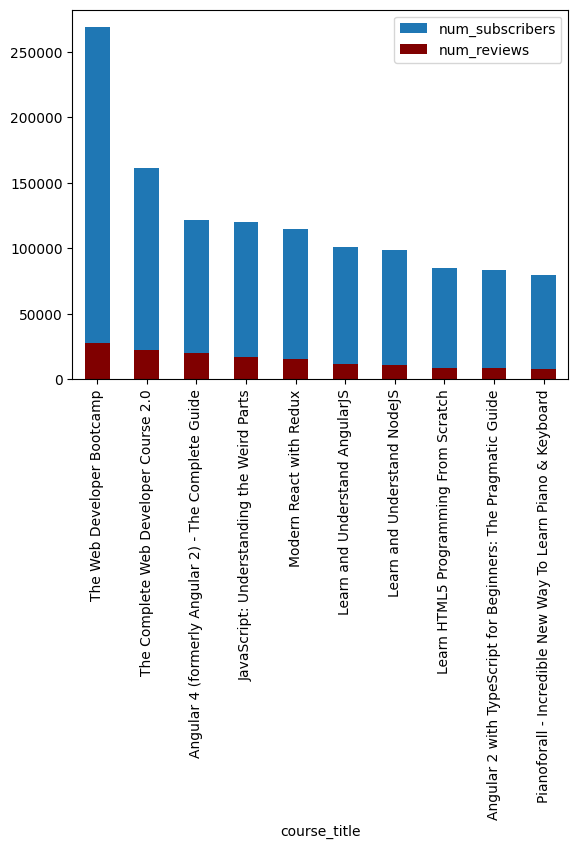

In [115]:
#df_sub.plot( x='course_title', y='num_subscribers', kind='hist')
ax = df_sub.plot(x="course_title", y="num_subscribers", kind="bar") 

df_rev.plot(x="course_title", y="num_reviews", kind="bar", ax=ax, color="maroon")


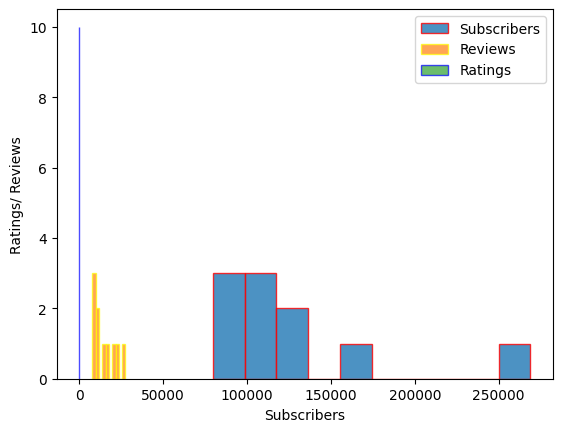

In [117]:
plt.hist(df_sub['num_subscribers'], label='Subscribers', alpha=.8, edgecolor='red')
 
# plotting second histogram
plt.hist(df_rev['num_reviews'], label='Reviews', alpha=0.7, edgecolor='yellow')

plt.hist(df_rat['Rating'], label='Ratings', alpha=0.7, edgecolor='Blue')

plt.legend()

plt.xlabel("Subscribers")
plt.ylabel("Ratings/ Reviews")
# Showing the plot using plt.show()
plt.show()

In [211]:
#use Ordinal encoder to convert categorical data into numerical data.
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df_new_data.level = oe.fit_transform(df_new_data[['level']])


In [212]:
df_new_data.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
36,695656.0,The Complete JavaScript Course For Web Develop...,https://www.udemy.com/javascriptcourse/,195.0,31499.0,450.0,46.0,1.0,0.76,4.0,2015-12-29T17:20:32Z,Subject: Web Development
37,19332.0,The Original Complete Web Developer Course.,https://www.udemy.com/thecompletewebdeveloper/,20.0,31070.0,742.0,195.0,1.0,0.07,18.0,2012-10-28T00:13:03Z,Subject: Web Development
38,511934.0,AngularJS For Beginners,https://www.udemy.com/angularjs-for-beginners-...,0.0,30531.0,1948.0,53.0,0.0,0.78,3.0,2015-06-30T20:28:22Z,Subject: Web Development
39,267560.0,Learn E-Commerce Website in PHP & MySQL From S...,https://www.udemy.com/ecommerce-website-in-php...,0.0,29990.0,1342.0,87.0,1.0,0.95,17.5,2014-08-10T10:27:28Z,Subject: Web Development
40,866460.0,Angular 2+ with Typescript - Essential Training,https://www.udemy.com/angular-2-training/,195.0,29348.0,780.0,66.0,1.0,0.31,3.0,2016-11-29T04:08:03Z,Subject: Web Development


In [213]:
df_ml_data = df_new_data.loc[:,['price', 'num_subscribers','num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration']]

In [215]:
df_ml_data

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration
36,195.0,31499.0,450.0,46.0,1.0,0.76,4.000000
37,20.0,31070.0,742.0,195.0,1.0,0.07,18.000000
38,0.0,30531.0,1948.0,53.0,0.0,0.78,3.000000
39,0.0,29990.0,1342.0,87.0,1.0,0.95,17.500000
40,195.0,29348.0,780.0,66.0,1.0,0.31,3.000000
...,...,...,...,...,...,...,...
3664,60.0,1.0,0.0,11.0,0.0,0.37,1.000000
3665,135.0,1.0,1.0,5.0,0.0,0.04,0.500000
3666,55.0,1.0,0.0,37.0,1.0,0.66,0.700000
3667,200.0,1.0,1.0,22.0,1.0,0.15,1.000000


In [216]:
#Transformation
df_ml_data['num_subscribers'] = np.sqrt(df_ml_data['num_subscribers'])

In [217]:
df_ml_data['num_lectures'] = np.sqrt(df_ml_data['num_lectures'])
df_ml_data['num_reviews'] = np.sqrt(df_ml_data['num_reviews'])
df_ml_data['price'] = np.sqrt(df_ml_data['price'])

In [218]:
df_ml_data

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration
36,13.964240,177.479576,21.213203,6.782330,1.0,0.76,4.000000
37,4.472136,176.266843,27.239677,13.964240,1.0,0.07,18.000000
38,0.000000,174.731222,44.136153,7.280110,0.0,0.78,3.000000
39,0.000000,173.176211,36.633318,9.327379,1.0,0.95,17.500000
40,13.964240,171.312580,27.928480,8.124038,1.0,0.31,3.000000
...,...,...,...,...,...,...,...
3664,7.745967,1.000000,0.000000,3.316625,0.0,0.37,1.000000
3665,11.618950,1.000000,1.000000,2.236068,0.0,0.04,0.500000
3666,7.416198,1.000000,0.000000,6.082763,1.0,0.66,0.700000
3667,14.142136,1.000000,1.000000,4.690416,1.0,0.15,1.000000


In [66]:
#Remove duplicates
display(df_ml_data.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
3675    False
3676    False
3677    False
3678    False
3679    False
Length: 3676, dtype: bool

In [219]:
#split data into X, y
X=df_ml_data[['price', 'num_subscribers','num_reviews', 'num_lectures', 'level', 'content_duration']]
y=df_ml_data['Rating']

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3200, 6)
(356, 6)
(3200,)
(356,)


# Standarisation

In [222]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train_sc = SS.fit_transform(X_train)

X_train_sc

array([[ 0.14844507, -0.80986953, -0.55451104,  0.83311714,  1.3209911 ,
         0.24623542],
       [-0.03013564, -1.06235617, -0.94706219, -0.57456408,  0.28109651,
        -0.17276092],
       [-0.03013564, -0.5543293 , -0.10775252,  0.48720643,  0.28109651,
         0.49763322],
       ...,
       [ 0.99742176, -0.39272274,  0.04823664,  1.24578392,  0.28109651,
         0.41383395],
       [-0.33574969, -1.06235617, -0.94706219, -1.11980872, -0.75879809,
        -0.50795798],
       [-1.90116599,  1.09754467,  2.05720924,  0.71446876, -0.75879809,
        -0.17276092]])

In [223]:
X_test_sc = SS.transform(X_test)

X_test_sc

array([[-0.71782249,  0.48920419,  0.22120743, -1.11980872,  2.3608857 ,
        -0.56103085],
       [-0.71782249, -0.72656651, -0.73723477, -0.81778157, -0.75879809,
        -0.25656018],
       [ 0.74487051, -0.5856947 , -0.37242614,  1.12119117, -0.75879809,
         0.33003468],
       ...,
       [-0.71782249, -0.12011733, -0.45497328, -0.66687629,  0.28109651,
        -0.25656018],
       [ 0.67787137, -0.29451188, -0.16195988,  0.37951375, -0.75879809,
        -0.34035945],
       [ 1.84089471,  0.41560361, -0.26714365,  1.12119117,  0.28109651,
         0.33003468]])

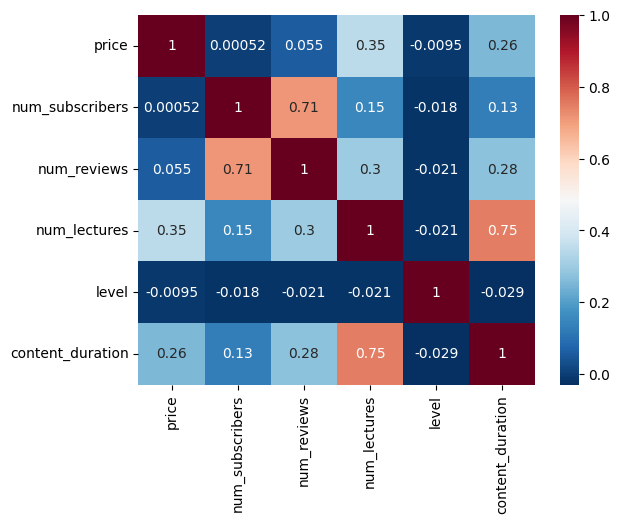

In [224]:
corr_matrix = X_train.corr(method='pearson') 

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.show()

In [225]:
#import regression algorithm.
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [226]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
print(lr.intercept_)
print(lr.coef_)
print(lr.score(X_train_sc, y_train))
print(lr.score(X_test_sc, y_test))

0.611615625
[ 0.01254232  0.00747288 -0.01788273 -0.04304677 -0.0065731   0.03406274]
0.009937517772716786
0.0012385742721365833


In [227]:
from sklearn import metrics
y_pred=lr.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))

0.4379128242690819
0.34593262699362765
0.1917676416593238


In [230]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score,KFold

lr_lasso = linear_model.Lasso(alpha=0.1)
lr_lasso.fit(X_train, y_train)
print(lr_lasso.intercept_)
print(lr_lasso.coef_)
print(lr_lasso.score(X_train, y_train))
print(lr_lasso.score(X_test, y_test))

0.6161607796598623
[ 0.         -0.00012394 -0.         -0.         -0.          0.        ]
0.00036241875350429
-0.0005925979133403203


In [231]:
lr_Ridge = linear_model.Ridge(alpha=0.1)
lr_Ridge.fit(X_train, y_train)
print(lr_Ridge.intercept_)
print(lr_Ridge.coef_)
print(lr_Ridge.score(X_train, y_train))
print(lr_Ridge.score(X_test, y_test))

0.6684128933922269
[ 0.00331871  0.00023198 -0.00265327 -0.01588701 -0.0068351   0.0057088 ]
0.009937517771328452
0.0012386765348048057


In [232]:
#R2 Score
print(metrics.r2_score(y_test,y_pred))

-0.6344930645789557


In [233]:
#check MAE
metrics.mean_absolute_error(y_test, y_pred)

0.34593262699362765

In [234]:
y_pred

array([0.80837336, 0.67759394, 0.62993344, 1.34871598, 0.64586203,
       0.55654571, 0.83165957, 0.80051127, 0.60793922, 0.73380574,
       1.0466868 , 0.74024449, 0.8532054 , 0.42787555, 0.6013311 ,
       0.79076926, 0.56563869, 0.56539883, 0.55670053, 0.52988691,
       0.70768165, 0.76939191, 0.59048357, 0.8725621 , 0.87211583,
       0.53004622, 0.6102812 , 0.73760051, 1.20735088, 1.46334023,
       0.8127033 , 0.95418129, 0.72178063, 0.87177336, 0.87452126,
       0.62880003, 1.07719593, 0.85390663, 0.6645432 , 1.02814163,
       0.91475232, 0.62108725, 0.61913988, 0.80068608, 0.63084058,
       0.82078222, 1.2136664 , 0.98403986, 1.57141297, 0.80058306,
       0.71447119, 0.66608774, 2.2755334 , 0.71807752, 0.75259875,
       0.56627945, 1.36332677, 0.55592531, 0.53946322, 0.898677  ,
       0.51098851, 0.80744946, 0.64510762, 0.59106138, 0.69048919,
       0.73589997, 0.55858175, 1.1813732 , 0.54667462, 0.78845603,
       0.60067758, 0.66715774, 0.77609957, 1.21723193, 0.69655

In [235]:
y_test.head()

562     0.66
1952    0.91
2718    0.76
2406    0.81
656     0.99
Name: Rating, dtype: float64

In [236]:
from sklearn.ensemble import AdaBoostRegressor

In [237]:
model_ABR = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=1.0, loss="linear",n_estimators=100, random_state=30)

model_ABR.fit(X_train_sc, y_train)
print(model_ABR)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100,
                  random_state=30)


In [238]:
expected_y  = y_test
predicted_y = model_ABR.predict(X_test_sc)

In [239]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))
    
plt.figure(figsize=(10,10))
#sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

-0.04712865628072671
0.055595669518743035


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [240]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import tree

crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
for depth in range (1,10):
    tree_regressor=tree.DecisionTreeRegressor(max_depth=depth,random_state=1)
    if tree_regressor.fit(X,y).tree_.max_depth<depth:
            break
    score=np.mean(cross_val_score(tree_regressor,X_train_sc,y_train,scoring='neg_mean_squared_error', cv=crossvalidation,n_jobs=1))
    print(depth, score)

1 -0.11067518411435588
2 -0.10888356167558026
3 -0.10576374447980712
4 -0.10438623443769954
5 -0.10514532370087729
6 -0.10601882896961996
7 -0.10817296409939088
8 -0.11521360599002421
9 -0.119772464082927


In [1]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)
xgbr.fit(X_train_sc, y_train)

score = xgbr.score(X_train_sc, y_train)  


print("Training score: ", score)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


NameError: name 'X_train_sc' is not defined

In [ ]:
scores = cross_val_score(xgbr, X_train_sc, y_train,cv=5,scoring='neg_mean_squared_error')
print("Mean cross-validation score: %.2f" % scores.mean())


In [150]:
kfold = KFold(n_splits=3, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())


K-fold CV average score: -0.06


In [151]:
y_pred = xgbr.predict(X_test)

In [176]:
y_pred

array([0.7227887 , 0.86966616, 0.99669224, 0.5354133 , 0.63178474,
       0.5299586 , 0.2862315 , 0.60820657, 0.5603386 , 0.85377467,
       0.34336266, 0.77264524, 0.94171476, 0.6787349 , 0.7166831 ,
       0.30445418, 0.3361781 , 0.5991768 , 0.73694783, 0.9223221 ,
       1.0251085 , 0.79708654, 0.9219547 , 0.624549  , 0.60332304,
       0.42316362, 0.5330273 , 0.5702934 , 0.30844128, 0.48258907,
       0.3614899 , 0.9978961 , 0.36640885, 0.6388878 , 0.80494326,
       0.24538156, 0.9505482 , 0.8370039 , 0.6391119 , 0.37061518,
       0.72359866, 0.29357287, 0.85768974, 0.47656417, 0.4427044 ,
       0.6589386 , 0.8111428 , 0.73328805, 0.45772827, 0.6154981 ,
       0.8164623 , 0.944363  , 0.8139339 , 0.81670153, 0.12250776,
       0.48745233, 0.6176825 , 0.5106617 , 0.80442774, 0.7994078 ,
       0.49254677, 0.8147047 , 0.92340684, 0.9404062 , 0.51900035,
       0.6380334 , 0.7364534 , 0.61185026, 0.67237717, 0.8298919 ,
       0.40106398, 0.695218  , 0.6262633 , 0.57240534, 0.91519

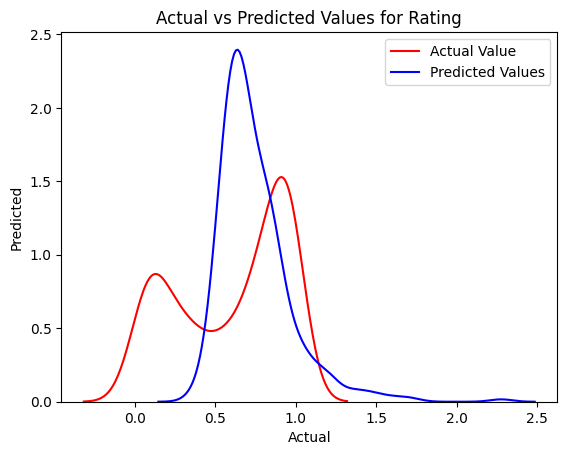

In [244]:

import seaborn as sns
%matplotlib inline 

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax1)


plt.title('Actual vs Predicted Values for Rating')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()
plt.close()

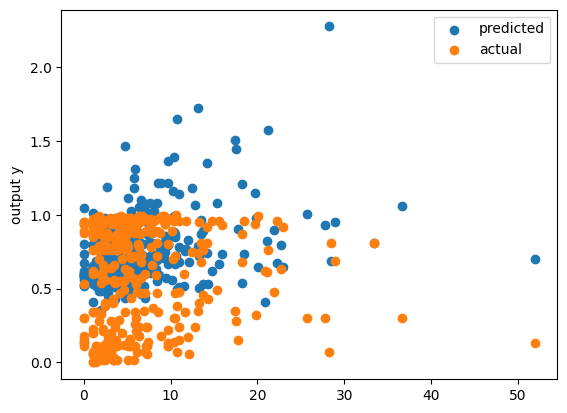

In [245]:
plt.figure()
plt.scatter(X_test['num_reviews'], y_pred, label='predicted')
plt.scatter(X_test['num_reviews'], y_test, label='actual')
plt.ylabel('output y')
plt.legend()
plt.show()